In [1]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn
import random
import statistics 

import numpy as np

ModuleNotFoundError: No module named 'pandas_profiling'

In [2]:
box_file_dir = os.path.join(os.getcwd(), "..", "..", "Box")
file_path_csv = os.path.join(box_file_dir, "covid_pts_enc_level_labs_dx_2021-02-02_deid.csv")

In [3]:
df = pd.read_csv(file_path_csv, index_col=False)

In [4]:
df.head()

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,False,False,NaN,4dMaH,61003,10650
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,False,False,3.0,8wQnr,84969,27818
2,2020-03-25 13:25:00,2020-03-30 03:48:00,Medical Center,IP Private/Semi Private room,80,Female,78758,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,...,True,False,True,True,True,False,1.0,6YGuu,69112,34412
3,2020-03-25 13:36:00,2020-03-27 13:15:00,Medical Center,IP Private/Semi Private room,56,Male,78746,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,P1Tjg,84820,37981
4,2020-03-25 13:43:00,2020-03-27 12:44:00,Medical Center,IP Private/Semi Private room,46,Female,78757,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,0.0,iouKO,76686,41152


In [5]:
def latinx(row):
    if row.ethnicity_display == 'Hispanic or Latino' and row.race_display == 'White':
        return "Hispanic"
    elif row.ethnicity_display == 'Not Hispanic or Latino' and row.race_display == 'White': 
        return "White"
    else:
        return row.race_display
        

In [6]:
df['race_display'] = df.apply(lambda row: latinx(row), axis=1)

In [7]:
vent_df = df[~df['vent_hours_summed'].isnull()]

In [8]:
len(vent_df)

303

In [9]:
Counter(vent_df['race_display'])

Counter({'Hispanic': 161,
         'White': 86,
         'Black or African American': 26,
         'Asian': 4,
         'Other Race': 12,
         'Unknown': 8,
         'Decline to Specify': 4,
         'American Indian/Alaska Native': 2})

In [10]:
icu_df = df[~df['icu_hours_summed'].isnull()]

In [11]:
Counter(icu_df['race_display'])

Counter({'Hispanic': 369,
         'White': 252,
         'Black or African American': 61,
         'Unknown': 16,
         'American Indian/Alaska Native': 4,
         'Asian': 7,
         'Other Race': 27,
         'Decline to Specify': 4,
         'Native Hawaiian or Other Pacific Islande': 1})

In [12]:
working_df = icu_df[~icu_df['qSOFA_score'].isnull()] 
Counter(working_df['race_display'])

Counter({'Hispanic': 357,
         'White': 242,
         'Black or African American': 59,
         'Unknown': 16,
         'American Indian/Alaska Native': 4,
         'Asian': 7,
         'Other Race': 26,
         'Decline to Specify': 4,
         'Native Hawaiian or Other Pacific Islande': 1})

In [13]:
data = icu_df[['age_at_admit', 'pO2_Art', 
               'qSOFA_score','race_display',
              'vent_hours_summed', 'zip_cust_table', 'heartfailure_com_flag',
              'cancer_com_flag','gender','WBC','Mean_Arterial_Pressure',
              'Bili_Total','CAD_com_flag','CKD_com_flag','COPD_com_flag',
 'Creatinine', 'FiO2/Percent','Glasgow_Coma_Score','diabetes_com_flag',
 'hypertension_com_flag','length_of_stay','discharge_disposition_display','Platelet', 'deid_empi_encounter']]

In [14]:
data.head()

,age_at_admit,pO2_Art,qSOFA_score,race_display,vent_hours_summed,zip_cust_table,heartfailure_com_flag,cancer_com_flag,gender,WBC,...,COPD_com_flag,Creatinine,FiO2/Percent,Glasgow_Coma_Score,diabetes_com_flag,hypertension_com_flag,length_of_stay,discharge_disposition_display,Platelet,deid_empi_encounter
0,49,NaN,NaN,Hispanic,NaN,Unknown,False,False,Male,NaN,...,False,1.1,NaN,NaN,False,False,6.75,Home,NaN,4dMaH
1,44,470.8,3.0,Hispanic,58.45,78130,False,False,Male,35.1,...,False,2.9,50.0,3.0,False,False,2.75,Expired,42.0,8wQnr
6,49,250.1,1.0,White,293.02,78612,False,False,Female,12.1,...,False,0.9,100.0,15.0,False,False,12.92,Home,355.0,P9yRo
11,24,56.4,2.0,White,1423.18,78753,False,False,Male,19.4,...,False,1.5,80.0,3.0,False,False,64.88,Long Term Care Hospital,370.0,23f5M
17,55,102.6,0.0,White,327.77,78602,False,False,Male,4.6,...,False,1.2,100.0,15.0,False,True,17.13,Expired,199.0,mNyVy


In [15]:
working_df[['race_display', 'age_at_admit']].groupby('race_display').agg(['mean', 'count'])

age_at_admit      
                                                 mean count
race_display                                               
American Indian/Alaska Native               34.000000     4
Asian                                       50.714286     7
Black or African American                   62.186441    59
Decline to Specify                          53.250000     4
Hispanic                                    56.929972   357
Native Hawaiian or Other Pacific Islande    41.000000     1
Other Race                                  51.461538    26
Unknown                                     67.000000    16
White                                       59.913223   242

In [16]:
# only 236 patients with all tests
allo_df = data[['pO2_Art', 'Creatinine', 'FiO2/Percent', 
      'Glasgow_Coma_Score', 'Platelet', 'Mean_Arterial_Pressure',
     'Bili_Total', 'deid_empi_encounter']].dropna()

In [17]:
list_of_patients = list(allo_df['deid_empi_encounter'])

In [18]:
adjusted_patients = data[data['deid_empi_encounter'].isin(list_of_patients)]

In [19]:
def calculate_sofa(row):
    count = 0
    
    # need to implement Fi02/po2
    
    if row.Platelet >= 100 and row.Platelet <= 149:
        count += 1 
        
    elif row.Platelet >= 50 and row.Platelet <= 99:
        count += 2
        
    elif row.Platelet >= 20 and row.Platelet <= 49:
        count += 3
        
    elif row.Platelet < 20:
        count += 4
       
    # Glasgow
    if row.Glasgow_Coma_Score == 13 or row.Glasgow_Coma_Score == 14:
        count += 1 
        
    elif row.Glasgow_Coma_Score >= 10 and row.Glasgow_Coma_Score <= 12:
        count += 2
        
    elif row.Glasgow_Coma_Score >= 6 and row.Glasgow_Coma_Score <= 9:
        count += 3
        
    elif row.Glasgow_Coma_Score < 6:
        count += 4
        
    # Bilirubin 
    
    if float(row.Bili_Total) >= 1.2 and float(row.Bili_Total) <= 1.9:
        count += 1 
        
    elif float(row.Bili_Total) >= 2.0 and float(row.Bili_Total) <= 5.9:
        count += 2
        
    elif float(row.Bili_Total) >= 6.0 and float(row.Bili_Total) <= 11.9:
        count += 3
        
    elif float(row.Bili_Total) >= 12.0:
        count += 4 
        
    # Need to implement Mean artieral pressure later 
    
    # Creatinine 
    
    if row.Creatinine >= 1.2 and row.Creatinine <= 1.9:
        count += 1 
        
    elif row.Creatinine >= 2.0 and row.Creatinine <= 3.4:
        count += 2
        
    elif row.Creatinine >= 3.5 and row.Creatinine <= 4.9:
        count += 3
        
    elif row.Creatinine >= 5.0:
        count += 4 
        
    return count 

In [20]:
allo_df['sofa'] = allo_df.apply(lambda row: calculate_sofa(row), axis = 1)

In [21]:
adjusted_patients['sofa'] = allo_df.apply(lambda row: calculate_sofa(row), axis = 1)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
allo_df['sofa'].describe()

count    236.000000
mean       1.716102
std        1.982883
min        0.000000
25%        0.000000
50%        1.000000
75%        2.250000
max       11.000000
Name: sofa, dtype: float64

In [23]:
adjusted_patients['sofa'].describe()

count    236.000000
mean       1.716102
std        1.982883
min        0.000000
25%        0.000000
50%        1.000000
75%        2.250000
max       11.000000
Name: sofa, dtype: float64

In [24]:
#https://www.mdcalc.com/sequential-organ-failure-assessment-sofa-score#evidence
sofa_mortality_calibration = {
    0: 0,
    1: 0 ,
    2: 6.4,
    3: 6.4,
    4: 20.2,
    5: 20.2,
    6: 21.5,
    7: 21.5,
    8: 33.3,
    9: 33.3 ,
    10: 50.0,
    11: 50.0 ,
    12: 95.2,
    13: 95.2 ,
    14: 95.2  , 
    
}

In [25]:
# still need to check corrobate 
# digging onto various studies on measuring qSOFA for different comorbidities 
# Min linked a paper about influenza 
# can use these values 

qsofa_mortality_calibration = {
    0: 0.6,
    1: 5 ,
    2: 10,
    3: 24,
    
}

In [26]:
working_df.dtypes

admit_dt_tm                object
discharge_dt_tm            object
facility                   object
encounter_type_display     object
age_at_admit                int64
                           ...   
cancer_com_flag            object
qSOFA_score               float64
deid_empi_encounter        object
deid_mrn_encounter          int64
deid_fin_encounter          int64
Length: 70, dtype: object

In [27]:
def comorbidity_count(row):
    count = 0 
    
    if row.COPD_com_flag == 1:
        count += 1 
        
    if row.asthma_com_flag == 1:
        count += 1 
        
    if row.diabetes_com_flag == 1:
        count += 1 
        
    if row.hypertension_com_flag == 1:
        count += 1 
        
    if row.CAD_com_flag == 1:
        count += 1 
        
    if row.heartfailure_com_flag == 1: 
        count += 1 
        
    if row.CKD_com_flag == 1:
        count += 1 
        
    if row.cancer_com_flag == 1:
        count += 1 
        
    return count

In [28]:
working_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']] = working_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']].fillna(0)

/home/joel/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [29]:
working_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']] = working_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']].astype(int)

In [30]:
working_df['total_comorbidities'] = working_df.apply(lambda row: comorbidity_count(row), axis=1)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
working_df['cancer_com_flag'].dtype

dtype('int64')

In [32]:
working_df['has_comorbidity'] = working_df.total_comorbidities.apply(lambda x: 1 if x >= 1 else 0)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
working_df['life_years'] = working_df.age_at_admit.apply(lambda x: 100 - x)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
Counter(adjusted_patients['discharge_disposition_display'])

Counter({'Home': 67,
         'Expired': 78,
         'Home Care with Home Health': 19,
         'Rehab Care': 8,
         'Another Hospital': 9,
         'Long Term Care Hospital': 30,
         'Skilled Nursing Care': 21,
         'Still a patient': 7,
         'Home Hospice Care': 1,
         nan: 4,
         'Hospice Facility': 1})

In [35]:
class Allocation(object):
    # Code will be adjusted for SOFA. Currently using qSOFA 
    # Only looking at State Level CSC for vent allocation 
    def __init__(self, patients, scarcity, sofa_calibration):
        self.patients = patients.copy() 
        self.patients['death'] = [0 for _ in range(len(self.patients))]
        self.patients['allocated_vent'] = ["no" for _ in range(len(self.patients))]
        
        self.num_vents = int(len(patients) * scarcity) 
        
        self.mortality_model = sofa_calibration
        
    def allocate(self, row):
        prob = self.mortality_model[row.qSOFA_score]
    
        
        death = np.random.binomial(size=1, n=1, p=prob*.01)[0]
        #print(death)
        
        if death == 1 or row.discharge_disposition_display == 'Expired':
            return death, 'yes'
        
        else:
            #print('yup yup')
            return death, 'yes'
    
    def check_expiration(self, df):

        temp_df = df.copy()
        for i, row in df.iterrows():
            row = row.copy()
            if (pd.isna(row.vent_hours_summed)) or row.discharge_disposition_display == 'Expired':
        
                temp_df.loc[i, 'death'] = 1

            else:
                
                temp_df.loc[i, 'death'] = 0
                    
        return temp_df
    
    def __run_allocation(self, df2):
        
        for i, row in df2.iterrows():
            row = row.copy()
            if self.num_vents == 0:
                #print('out')
                break
            
            mortality, allocate_cond = self.allocate(row)
            
            df2.loc[i, 'death'] = mortality
                
            df2.loc[i, 'allocated_vent'] = allocate_cond
            
            self.num_vents -= 1 
        
        non_allocated = df2[df2['allocated_vent']=='no']
        allocated = df2[df2['allocated_vent']=='yes']
        
        adj_df = self.check_expiration(non_allocated)
        
        return pd.concat([allocated, adj_df])
        
                    
    def lottery(self):
        temp_patients = self.patients.copy()
        
        temp_patients.sample(frac=1)
        
        out_df = self.__run_allocation(temp_patients)
        return out_df 
    
    def youngest(self):
        temp_patients = self.patients.copy()
        
        temp_patients.sort_values(by=['age_at_admit'], ascending=True, inplace=True)
        
        out_df = self.__run_allocation(temp_patients)
        return out_df 
    
    # pandas function
    def __age_categorization(self, row):
        if row.age_at_admit < 50:
            return 1 
        elif row.age_at_admit < 70: 
            return 2 
        elif row.age_at_admit < 85:
            return 3 
        else:
            return 4
        
            
        
    def maryland(self):
        temp_patients = self.patients.copy()
        temp_patients['age_cat'] = temp_patients.apply(lambda row: self.__age_categorization(row)
                                                       , axis=1)
        
        temp_patients.sort_values(by=['qSOFA_score', 'total_comorbidities', 'age_cat'], 
                                      ascending=[True, True, True], inplace=True)
        
        out_df = self.__run_allocation(temp_patients)
        return out_df 
            
    def new_york(self):
        temp_patients = self.patients.copy()

        groups = [df for _, df in temp_patients.groupby('qSOFA_score')]
        random.shuffle(groups)

        grouped = pd.concat(groups).reset_index(drop=True)
        grouped = grouped.sort_values('qSOFA_score', ascending=True)
        
        out_df = self.__run_allocation(grouped)
        return out_df 
            
    
    def max_lives_saved(self):
        temp_patients = self.patients.copy()
        
        temp_patients.sort_values(by=['qSOFA_score'], ascending=True, inplace=True)
        
        out_df = self.__run_allocation(temp_patients)
        return out_df 
    
    def max_life_years(self):
        temp_patients = self.patients.copy()

        temp_patients.sort_values(by=['qSOFA_score', 'life_years'], ascending=[True,False], inplace=True)

        out_df = self.__run_allocation(temp_patients)
        return out_df 
        
    def sickest_first(self):
        temp_patients = self.patients.copy()
        
        temp_patients.sort_values(by=['qSOFA_score'], ascending=False, inplace=True)
        
        out_df = self.__run_allocation(temp_patients)
        return out_df 
        

In [36]:
zip_df = pd.read_csv('zip_code_data.csv', index_col=False)
zip_df['zip_code'] = zip_df.zip_code.apply(lambda x: x.strip('ZCTA5 '))

In [37]:
working_df = pd.merge(working_df, zip_df, left_on='zip_cust_table', right_on='zip_code', how='inner')

### Baseline

In [38]:
Counter(working_df['discharge_disposition_display'])

Counter({'Expired': 148,
         'Rehab Care': 19,
         'Skilled Nursing Care': 50,
         'Still a patient': 12,
         'Home': 280,
         'Long Term Care Hospital': 50,
         'Home Care with Home Health': 48,
         'Another Hospital': 12,
         nan: 14,
         'Home Hospice Care': 6,
         'Hospice Facility': 4,
         'Court/Law Enforcement': 1,
         'Intermediate Care': 4,
         'Psychiatric Hospital': 1,
         'Against Medical Advice': 3})

In [39]:
def latinx(row):
    if row.ethnicity_display == 'Hispanic or Latino' and row.race_display == 'White':
        return "Hispanic"
    elif row.ethnicity_display == 'Not Hispanic or Latino' and row.race_display == 'White': 
        return "White"
    else:
        return row.race_display

In [40]:
working_df['race_display'] = df.apply(lambda row: latinx(row), axis=1)

In [41]:
# later think about the mortality rate as well 
# summarize what I'm going to do and send to Victoria 

In [42]:
len(working_df)

652

In [43]:
# compute other descriptive stats for this groupby 
# final analysis 
working_df[['race_display', 'age_at_admit']].groupby('race_display').agg(['mean', 'std', 'count']).round(2)

age_at_admit             
                                      mean    std count
race_display                                           
American Indian/Alaska Native        59.67  12.74     3
Asian                                59.14  20.31     7
Black or African American            61.68  16.85    65
Decline to Specify                   57.22  17.90     9
Hispanic                             57.51  17.36   309
Other Race                           58.46  21.00    37
Unknown                              55.21  18.16    24
White                                56.75  17.45   198

In [44]:
Counter(working_df['qSOFA_score'])

Counter({3.0: 14, 2.0: 99, 1.0: 363, 0.0: 176})

In [45]:
len(working_df['zip_cust_table'].unique())

97

In [46]:
# zip code demo eda 
c = Counter(working_df['zip_cust_table'])
alist = c.most_common()
sum_patient = list(filter(lambda x: x[0][2] == '7', alist))

print(len(sum_patient))
num_p = 0 
for x in sum_patient:
    num_p += x[1]
    
num_p

37


327

In [47]:
c = Counter(working_df['zip_cust_table'])
alist = c.most_common()
n_alist = list(filter(lambda x: x[1] > 1, alist))
print(len(n_alist))
#n_alist

60


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


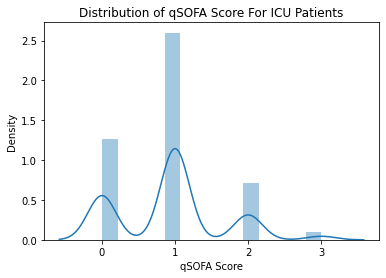

In [172]:
sn_plot = sn.distplot(working_df['qSOFA_score'])
plt.title('Distribution of qSOFA Score For ICU Patients')
plt.xlabel('qSOFA Score')
plt.savefig("final_figures/qSOFA_distribution.png")

In [49]:
race_count = Counter(working_df['race_display'])
race_count

Counter({'Hispanic': 309,
         'Black or African American': 65,
         'White': 198,
         'Asian': 7,
         'Unknown': 24,
         'Other Race': 37,
         'American Indian/Alaska Native': 3,
         'Decline to Specify': 9})

In [50]:
working_df['poverty_rate'] = working_df['poverty_rate'].astype(float)
working_df['median_income'] = working_df['median_income'].astype(float)

In [51]:
bins = [0, 6, 12, 18,24,30,36,40]
bin_conv = [i+1 for i in range(len(bins))]
working_df['zip_binned_by_poverty'] = np.searchsorted(bins, working_df['poverty_rate'].values)
#temp_df['zip_binned_by_poverty'] = np.searchsorted(bins, temp_df['poverty_rate'].values)

In [52]:
bins = [20000, 40000, 60000, 80000,100000]
bin_conv = [i+1 for i in range(len(bins))]
working_df['zip_binned_by_income'] = np.searchsorted(bins, working_df['median_income'].values)

In [53]:
expired_df = working_df[working_df['discharge_disposition_display']=='Expired']

In [54]:
expired_df

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,zip_binned_by_poverty,zip_binned_by_income
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,0,56,78130,1.5,10,65627.0,84515,9.5,2,3
7,2020-09-24 18:34:00,2020-10-23 15:44:00,Dell Seton Med Cntr UT,IP ICU,70,Male,78612,Hispanic or Latino,White,White Hispanic,...,1,30,78612,6.3,10.9,69213.0,80458,10.6,2,3
8,2020-10-07 18:00:00,2020-11-16 12:30:00,Dell Seton Med Cntr UT,IP ICU,63,Male,78612,Hispanic or Latino,Asian,White Hispanic,...,1,37,78612,6.3,10.9,69213.0,80458,10.6,2,3
14,2020-04-23 20:17:00,2020-05-15 22:00:00,Medical Center,IP ICU,79,Female,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,21,78753,2,19.3,51053.0,68301,17.6,3,2
15,2020-04-23 20:18:00,2020-05-01 10:00:00,Medical Center,IP ICU,83,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,17,78753,2,19.3,51053.0,68301,17.6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2020-06-24 11:24:00,2020-07-02 02:30:00,Dell Seton Med Cntr UT,IP Private Room,95,Female,78731,Not Hispanic or Latino,Hispanic,White Non Hispanic,...,1,5,78731,2.4,10.3,94851.0,154457,9.0,2,4
620,2020-08-04 00:42:00,2020-08-06 06:36:00,Dell Seton Med Cntr UT,IP ICU,69,Female,78731,Not Hispanic or Latino,Hispanic,Other race Non Hispanic,...,1,31,78731,2.4,10.3,94851.0,154457,9.0,2,4
628,2020-07-05 13:54:00,2020-07-19 20:27:00,Dell Seton Med Cntr UT,IP ICU,83,Male,77988,Hispanic or Latino,Hispanic,White Hispanic,...,1,17,77988,16.6,5.5,52794.0,61814,8.6,2,2
635,2020-08-10 13:56:00,2020-09-16 06:38:00,Dell Seton Med Cntr UT,IP ICU,78,Male,78801,Hispanic or Latino,Hispanic,White Hispanic,...,1,22,78801,4.4,20.4,42360.0,57916,18.4,4,2


In [55]:
# From Min 
# Think about a table or graph that we would like 
# to hav

In [56]:
Counter(expired_df['race_display'])

Counter({'Hispanic': 71,
         'White': 42,
         'Asian': 3,
         'Unknown': 3,
         'Black or African American': 18,
         'Other Race': 11})

In [57]:
# number of patients who were on a ventilator 

In [58]:
vent_df = working_df[~working_df['vent_hours_summed'].isnull()]
vent_df

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,zip_binned_by_poverty,zip_binned_by_income
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,0,56,78130,1.5,10,65627.0,84515,9.5,2,3
1,2020-06-21 16:50:00,2020-07-23 16:55:00,Medical Center,IP Private/Semi Private room,71,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,1,29,78130,1.5,10,65627.0,84515,9.5,2,3
4,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,...,0,51,78612,6.3,10.9,69213.0,80458,10.6,2,3
5,2020-07-10 15:42:00,2020-08-13 17:45:00,Medical Center,IP ICU,59,Male,78612,Hispanic or Latino,Hispanic,Other Race Hispanic,...,1,41,78612,6.3,10.9,69213.0,80458,10.6,2,3
7,2020-09-24 18:34:00,2020-10-23 15:44:00,Dell Seton Med Cntr UT,IP ICU,70,Male,78612,Hispanic or Latino,White,White Hispanic,...,1,30,78612,6.3,10.9,69213.0,80458,10.6,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,2020-08-10 13:56:00,2020-09-16 06:38:00,Dell Seton Med Cntr UT,IP ICU,78,Male,78801,Hispanic or Latino,Hispanic,White Hispanic,...,1,22,78801,4.4,20.4,42360.0,57916,18.4,4,2
638,2020-10-28 18:42:00,2020-11-18 06:07:00,Dell Seton Med Cntr UT,IP ICU,71,Male,79907,Hispanic or Latino,Hispanic,White Hispanic,...,1,29,79907,3,29.4,31784.0,43469,27.6,5,1
642,2020-11-10 00:45:00,NaN,Dell Seton Med Cntr UT,IP ICU,70,Male,79719,Hispanic or Latino,Black or African American,White Hispanic,...,0,30,79719,17.7,21.3,42708.0,47424,24.8,5,2
645,2020-11-12 13:00:00,2020-11-15 14:56:00,Williamson,IP ICU,85,Female,78681,Unknown,Black or African American,White Unknown Ethnicity,...,1,15,78681,0.8,4.7,107912.0,127129,3.5,1,5


In [59]:
# 716 icu patients
# 148 patients who died 
# 289 patients on vents

In [60]:
# Number of patients who died on vent 
vent_df[vent_df['discharge_disposition_display']=='Expired']

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,zip_binned_by_poverty,zip_binned_by_income
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,0,56,78130,1.5,10,65627.0,84515,9.5,2,3
7,2020-09-24 18:34:00,2020-10-23 15:44:00,Dell Seton Med Cntr UT,IP ICU,70,Male,78612,Hispanic or Latino,White,White Hispanic,...,1,30,78612,6.3,10.9,69213.0,80458,10.6,2,3
8,2020-10-07 18:00:00,2020-11-16 12:30:00,Dell Seton Med Cntr UT,IP ICU,63,Male,78612,Hispanic or Latino,Asian,White Hispanic,...,1,37,78612,6.3,10.9,69213.0,80458,10.6,2,3
14,2020-04-23 20:17:00,2020-05-15 22:00:00,Medical Center,IP ICU,79,Female,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,21,78753,2,19.3,51053.0,68301,17.6,3,2
15,2020-04-23 20:18:00,2020-05-01 10:00:00,Medical Center,IP ICU,83,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,17,78753,2,19.3,51053.0,68301,17.6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2020-08-14 10:46:00,2020-10-03 20:00:00,Dell Seton Med Cntr UT,IP ICU,58,Male,78721,Hispanic or Latino,White,White Hispanic,...,1,42,78721,5.2,29.3,46591.0,69089,25.2,5,2
614,2020-07-30 23:54:00,2020-09-10 12:17:00,Dell Seton Med Cntr UT,IP ICU,69,Male,78748,Hispanic or Latino,White,White Hispanic,...,1,31,78748,2.2,10,76909.0,92430,9.2,2,3
628,2020-07-05 13:54:00,2020-07-19 20:27:00,Dell Seton Med Cntr UT,IP ICU,83,Male,77988,Hispanic or Latino,Hispanic,White Hispanic,...,1,17,77988,16.6,5.5,52794.0,61814,8.6,2,2
635,2020-08-10 13:56:00,2020-09-16 06:38:00,Dell Seton Med Cntr UT,IP ICU,78,Male,78801,Hispanic or Latino,Hispanic,White Hispanic,...,1,22,78801,4.4,20.4,42360.0,57916,18.4,4,2


In [61]:
# 114 vent patients died 
# 175 vent patients survived 

In [62]:
Counter(vent_df[vent_df['discharge_disposition_display']=='Expired']['zip_binned_by_poverty'])

Counter({2: 36, 3: 33, 4: 21, 1: 12, 5: 9})

<AxesSubplot:>

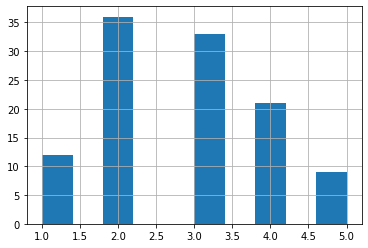

In [63]:
vent_df[vent_df['discharge_disposition_display']=='Expired']['zip_binned_by_poverty'].hist()

In [64]:
vent_df[vent_df['discharge_disposition_display']!='Expired']['zip_binned_by_poverty']

1      2
4      2
5      2
9      3
16     3
      ..
629    1
634    2
642    5
645    1
646    4
Name: zip_binned_by_poverty, Length: 165, dtype: int64

<AxesSubplot:>

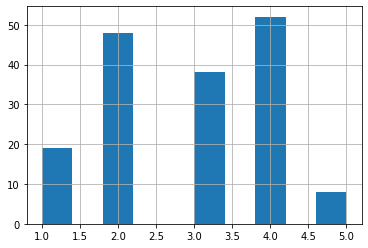

In [65]:
vent_df[vent_df['discharge_disposition_display']!='Expired']['zip_binned_by_poverty'].hist()

In [66]:
vent_df[vent_df['discharge_disposition_display']!='Expired']['zip_binned_by_poverty']

1      2
4      2
5      2
9      3
16     3
      ..
629    1
634    2
642    5
645    1
646    4
Name: zip_binned_by_poverty, Length: 165, dtype: int64

In [67]:
Counter(vent_df[vent_df['discharge_disposition_display']=='Expired']['qSOFA_score'])

Counter({3.0: 4, 1.0: 52, 0.0: 24, 2.0: 31})

<AxesSubplot:>

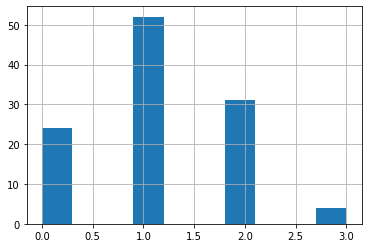

In [68]:
vent_df[vent_df['discharge_disposition_display']=='Expired']['qSOFA_score'].hist()

In [69]:
Counter(vent_df[vent_df['discharge_disposition_display']!='Expired']['qSOFA_score'])

Counter({2.0: 33, 1.0: 99, 0.0: 27, 3.0: 6})

<AxesSubplot:>

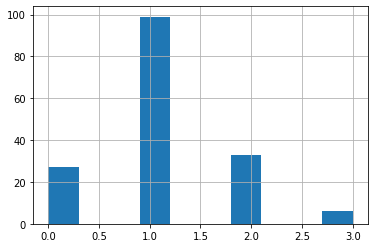

In [70]:
vent_df[vent_df['discharge_disposition_display']!='Expired']['qSOFA_score'].hist()

In [71]:
# 114
vent_df[vent_df['discharge_disposition_display']=='Expired']

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,zip_binned_by_poverty,zip_binned_by_income
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,0,56,78130,1.5,10,65627.0,84515,9.5,2,3
7,2020-09-24 18:34:00,2020-10-23 15:44:00,Dell Seton Med Cntr UT,IP ICU,70,Male,78612,Hispanic or Latino,White,White Hispanic,...,1,30,78612,6.3,10.9,69213.0,80458,10.6,2,3
8,2020-10-07 18:00:00,2020-11-16 12:30:00,Dell Seton Med Cntr UT,IP ICU,63,Male,78612,Hispanic or Latino,Asian,White Hispanic,...,1,37,78612,6.3,10.9,69213.0,80458,10.6,2,3
14,2020-04-23 20:17:00,2020-05-15 22:00:00,Medical Center,IP ICU,79,Female,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,21,78753,2,19.3,51053.0,68301,17.6,3,2
15,2020-04-23 20:18:00,2020-05-01 10:00:00,Medical Center,IP ICU,83,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,...,1,17,78753,2,19.3,51053.0,68301,17.6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2020-08-14 10:46:00,2020-10-03 20:00:00,Dell Seton Med Cntr UT,IP ICU,58,Male,78721,Hispanic or Latino,White,White Hispanic,...,1,42,78721,5.2,29.3,46591.0,69089,25.2,5,2
614,2020-07-30 23:54:00,2020-09-10 12:17:00,Dell Seton Med Cntr UT,IP ICU,69,Male,78748,Hispanic or Latino,White,White Hispanic,...,1,31,78748,2.2,10,76909.0,92430,9.2,2,3
628,2020-07-05 13:54:00,2020-07-19 20:27:00,Dell Seton Med Cntr UT,IP ICU,83,Male,77988,Hispanic or Latino,Hispanic,White Hispanic,...,1,17,77988,16.6,5.5,52794.0,61814,8.6,2,2
635,2020-08-10 13:56:00,2020-09-16 06:38:00,Dell Seton Med Cntr UT,IP ICU,78,Male,78801,Hispanic or Latino,Hispanic,White Hispanic,...,1,22,78801,4.4,20.4,42360.0,57916,18.4,4,2


In [72]:
len(working_df)

652

In [73]:
thresholds = np.linspace(0,1,11)

In [74]:
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [75]:
race_count

Counter({'Hispanic': 309,
         'Black or African American': 65,
         'White': 198,
         'Asian': 7,
         'Unknown': 24,
         'Other Race': 37,
         'American Indian/Alaska Native': 3,
         'Decline to Specify': 9})

In [76]:
baseline_deaths = Counter(working_df[working_df['discharge_disposition_display'] == 'Expired']['race_display'])
baseline_deaths

Counter({'Hispanic': 71,
         'White': 42,
         'Asian': 3,
         'Unknown': 3,
         'Black or African American': 18,
         'Other Race': 11})

In [77]:
race_count

Counter({'Hispanic': 309,
         'Black or African American': 65,
         'White': 198,
         'Asian': 7,
         'Unknown': 24,
         'Other Race': 37,
         'American Indian/Alaska Native': 3,
         'Decline to Specify': 9})

In [78]:
def death_percent(row):
    count = race_count[row.race]
    
    return 100 * (row.death_counts / count)

In [79]:
avg_base_death = statistics.mean(baseline_deaths.values())
baseline_deaths2 = pd.DataFrame(baseline_deaths.items(), columns=['race', 'death_counts'])
baseline_deaths2['threshold'] = 1.1
baseline_deaths2['avg_deaths'] = avg_base_death
baseline_deaths2['death_percent'] = baseline_deaths2.apply(lambda row: death_percent(row), axis=1)
baseline_deaths2['allocation_type'] = 'Baseline'
baseline_deaths2

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71,1.1,24.666667,22.977346,Baseline
1,White,42,1.1,24.666667,21.212121,Baseline
2,Asian,3,1.1,24.666667,42.857143,Baseline
3,Unknown,3,1.1,24.666667,12.500000,Baseline
4,Black or African American,18,1.1,24.666667,27.692308,Baseline
5,Other Race,11,1.1,24.666667,29.729730,Baseline


In [80]:
ITER = 1000

### Lottery

In [81]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

all_iters = []

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    
    iter_df_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.lottery()
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        
        count_dict = Counter(racial_deaths['race_display'])
        
        count_df = pd.DataFrame.from_dict(count_dict, orient='index').reset_index()
        count_df = count_df.rename(columns={'index': 'race', 0: 'death_counts'})
        
        dict_list.append(count_dict)
        iter_df_list.append(count_df)

    out_df = pd.concat(df_inner_list)
    out_df.to_csv('sim_results/lottery_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    #print(temp_new_df)
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    
    out_new_df = pd.concat(iter_df_list)
    
    out_new_df['threshold'] = threshold.round(3)
    #print(out_new_df)
    df_list_lot.append(temp_new_df)
    all_iters.append(out_new_df)

all_iters_df = pd.concat(all_iters)   
all_iters_df = all_iters_df.sort_values(by=['threshold', 'race'], inplace=False)
all_iters_df.to_csv('sim_results/all_lottery.csv'.format(threshold.round(3)))

In [82]:
race_count

Counter({'Hispanic': 309,
         'Black or African American': 65,
         'White': 198,
         'Asian': 7,
         'Unknown': 24,
         'Other Race': 37,
         'American Indian/Alaska Native': 3,
         'Decline to Specify': 9})

In [83]:
try_df = pd.concat(df_list_lot)
try_df['death_percent'] = try_df.apply(lambda row: death_percent(row), axis=1)
try_df.to_csv('lottery_data_results.csv', index=False)
try_df 

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,Other Race,2.274,1.0,32.340000,6.145946,NaN
4,Unknown,1.781,1.0,32.340000,7.420833,NaN
5,Decline to Specify,1.237,1.0,32.340000,13.744444,NaN
6,Asian,1.117,1.0,32.340000,15.957143,NaN


In [84]:
race_hue_labels = working_df['race_display'].unique()
race_hue_labels

array(['Hispanic', 'Black or African American', 'White', 'Asian',
       'Unknown', 'Other Race', 'American Indian/Alaska Native',
       'Decline to Specify'], dtype=object)

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


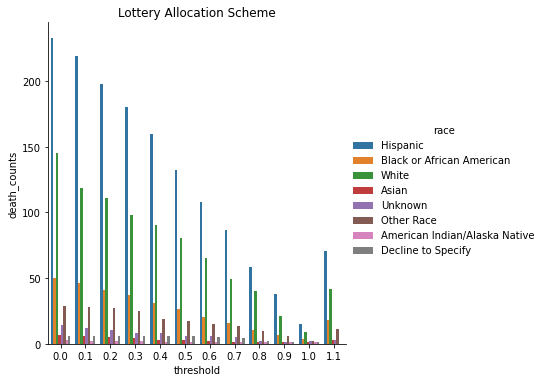

In [85]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', 
                        hue='race', hue_order = race_hue_labels, data=try_df, kind='bar')
plt.title('Lottery Allocation Scheme')
sn_plot.savefig("lottery_plot_output.png")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 'Observed']


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


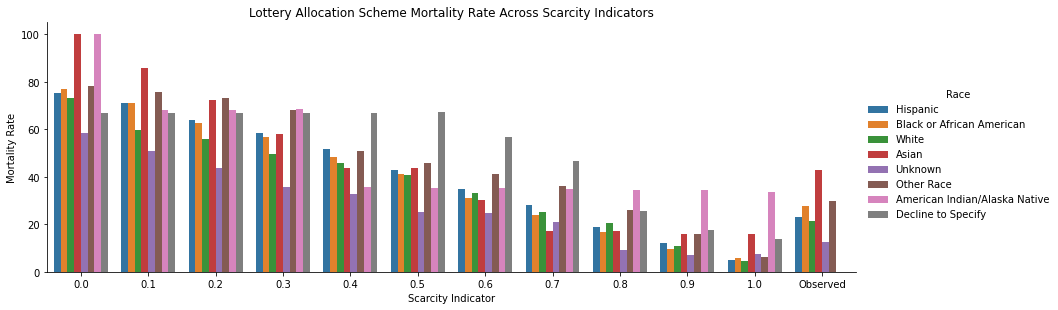

In [161]:
#%matplotlib qt
'''
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df, kind='bar')
plt.title('Lottery Allocation Scheme')
sn_plot.savefig("lottery_plot_percent_output.png")
'''

temp_df = try_df.replace(to_replace=[1.1], value=['Observed'])
x_vals = list(temp_df['threshold'].unique())
x_vals.append(x_vals.pop(0))
print(x_vals)

sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=temp_df, kind='bar', order=x_vals, height=4, aspect=3)

plt.title('Lottery Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sn_plot._legend.set_title('Race')


sn_plot.savefig("final_figures/lottery_plot_percent_output.png")

### New York 

In [87]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

all_iters = []

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    
    iter_df_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.new_york()
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        
        count_dict = Counter(racial_deaths['race_display'])
        
        count_df = pd.DataFrame.from_dict(count_dict, orient='index').reset_index()
        count_df = count_df.rename(columns={'index': 'race', 0: 'death_counts'})
        
        dict_list.append(count_dict)
        iter_df_list.append(count_df)

    out_df = pd.concat(df_inner_list)
    out_df.to_csv('sim_results/new_york_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    #print(temp_new_df)
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    
    out_new_df = pd.concat(iter_df_list)
    
    out_new_df['threshold'] = threshold.round(3)
    #print(out_new_df)
    df_list_lot.append(temp_new_df)
    all_iters.append(out_new_df)

all_iters_df = pd.concat(all_iters)   
all_iters_df = all_iters_df.sort_values(by=['threshold', 'race'], inplace=False)
all_iters_df.to_csv('sim_results/all_ny.csv'.format(threshold.round(3)))


In [88]:
try_df_ny = pd.concat(df_list_lot)
try_df_ny['death_percent'] = try_df_ny.apply(lambda row: death_percent(row), axis=1)
try_df_ny.to_csv('ny_data_results.csv', index=False)
try_df_ny

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,Asian,1.081,1.0,32.403000,15.442857,NaN
4,Other Race,2.208,1.0,32.403000,5.967568,NaN
5,Unknown,1.851,1.0,32.403000,7.712500,NaN
6,Decline to Specify,1.251,1.0,32.403000,13.900000,NaN


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


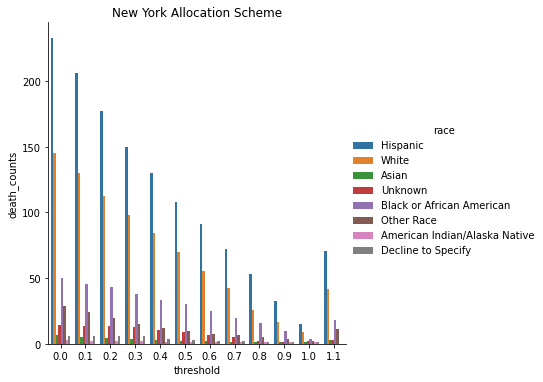

In [89]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', hue='race', data=try_df_ny, kind='bar')
plt.title('New York Allocation Scheme')
sn_plot.savefig("ny_plot_output.png")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 'Observed']


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


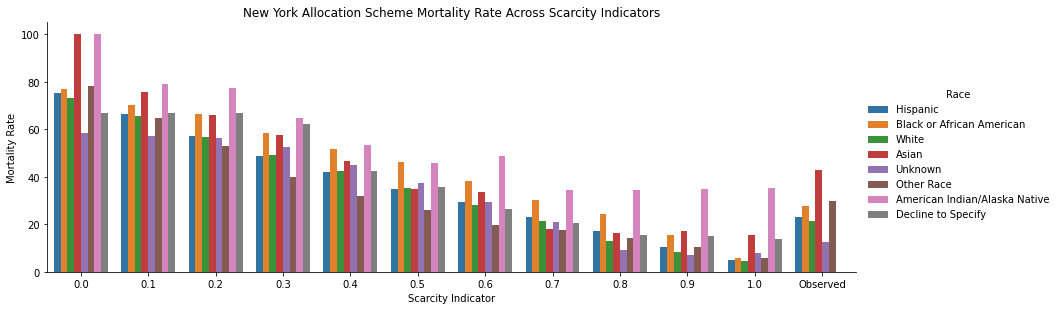

In [162]:
#%matplotlib qt
'''
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df_ny, kind='bar')
plt.title('New York Allocation Scheme')
sn_plot.savefig("ny_plot_percent_output.png")
'''

temp_df = try_df_ny.replace(to_replace=[1.1], value=['Observed'])
x_vals = list(temp_df['threshold'].unique())
x_vals.append(x_vals.pop(0))
print(x_vals)

sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=temp_df, kind='bar', order=x_vals, height=4, aspect=3)

plt.title('New York Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sn_plot._legend.set_title('Race')


sn_plot.savefig("final_figures/ny_plot_percent_output.png")

### Maryland 

In [91]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

all_iters = []

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    
    iter_df_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.maryland()
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        
        count_dict = Counter(racial_deaths['race_display'])
        
        count_df = pd.DataFrame.from_dict(count_dict, orient='index').reset_index()
        count_df = count_df.rename(columns={'index': 'race', 0: 'death_counts'})
        
        dict_list.append(count_dict)
        iter_df_list.append(count_df)

    out_df = pd.concat(df_inner_list)
    out_df.to_csv('sim_results/maryland_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    #print(temp_new_df)
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    
    out_new_df = pd.concat(iter_df_list)
    
    out_new_df['threshold'] = threshold.round(3)
    #print(out_new_df)
    df_list_lot.append(temp_new_df)
    all_iters.append(out_new_df)

all_iters_df = pd.concat(all_iters)   
all_iters_df = all_iters_df.sort_values(by=['threshold', 'race'], inplace=False)
all_iters_df.to_csv('sim_results/all_mar.csv'.format(threshold.round(3)))

In [92]:
try_df_mar = pd.concat(df_list_lot)
try_df_mar['death_percent'] = try_df_mar.apply(lambda row: death_percent(row), axis=1)
try_df_mar.to_csv('mar_data_results.csv', index=False)
try_df_mar

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,Decline to Specify,1.285,1.0,32.354000,14.277778,NaN
4,Unknown,1.872,1.0,32.354000,7.800000,NaN
5,Other Race,2.171,1.0,32.354000,5.867568,NaN
6,Asian,1.090,1.0,32.354000,15.571429,NaN


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


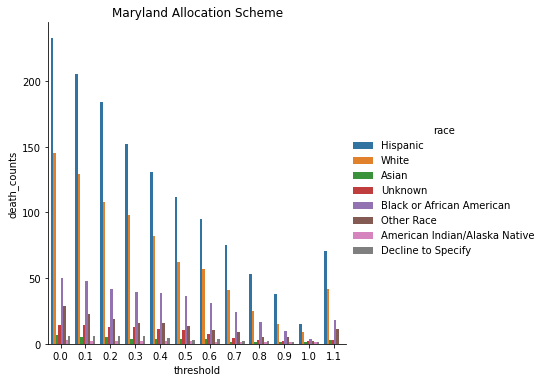

In [93]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', hue='race', data=try_df_mar, kind='bar')
plt.title('Maryland Allocation Scheme')
sn_plot.savefig("mar_plot_output.png")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 'Observed']


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


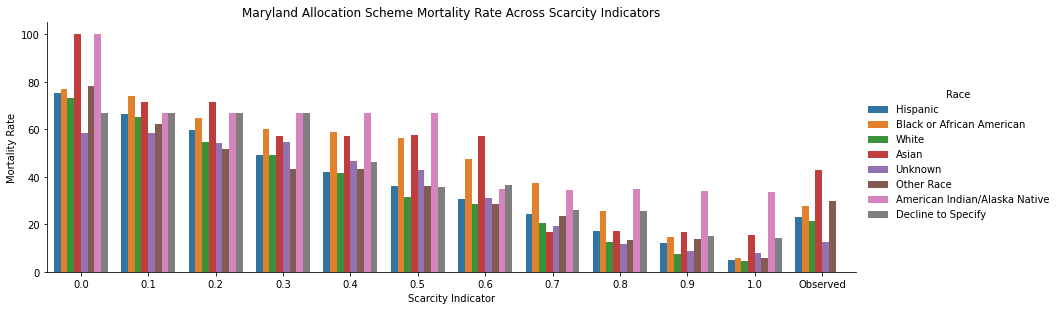

In [163]:
#%matplotlib qt
import matplotlib.pyplot as plt
'''
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df_mar, kind='bar')
plt.title('Maryland Allocation Scheme')
sn_plot.savefig("mar_plot_percent_output.png")
'''

temp_df = try_df_mar.replace(to_replace=[1.1], value=['Observed'])
x_vals = list(temp_df['threshold'].unique())
x_vals.append(x_vals.pop(0))
print(x_vals)

sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=temp_df, kind='bar', order=x_vals, height=4, aspect=3)

plt.title('Maryland Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sn_plot._legend.set_title('Race')


sn_plot.savefig("final_figures/mar_plot_percent_output.png")

### Max Lives Years

In [95]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

all_iters = []

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    
    iter_df_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.max_life_years()
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        
        count_dict = Counter(racial_deaths['race_display'])
        
        count_df = pd.DataFrame.from_dict(count_dict, orient='index').reset_index()
        count_df = count_df.rename(columns={'index': 'race', 0: 'death_counts'})
        
        dict_list.append(count_dict)
        iter_df_list.append(count_df)

    out_df = pd.concat(df_inner_list)
    out_df.to_csv('sim_results/max_life_years_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    #print(temp_new_df)
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    
    out_new_df = pd.concat(iter_df_list)
    
    out_new_df['threshold'] = threshold.round(3)
    #print(out_new_df)
    df_list_lot.append(temp_new_df)
    all_iters.append(out_new_df)

all_iters_df = pd.concat(all_iters)   
all_iters_df = all_iters_df.sort_values(by=['threshold', 'race'], inplace=False)
all_iters_df.to_csv('sim_results/all_max_life_years.csv'.format(threshold.round(3)))

In [96]:
try_df_max_life = pd.concat(df_list_lot)
try_df_max_life['death_percent'] = try_df_max_life.apply(lambda row: death_percent(row), axis=1)
try_df_max_life.to_csv('max_lives_data_results.csv', index=False)
try_df_max_life

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,Other Race,2.203,1.0,32.366000,5.954054,NaN
4,Black or African American,3.945,1.0,32.366000,6.069231,NaN
5,Unknown,1.802,1.0,32.366000,7.508333,NaN
6,Decline to Specify,1.258,1.0,32.366000,13.977778,NaN


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


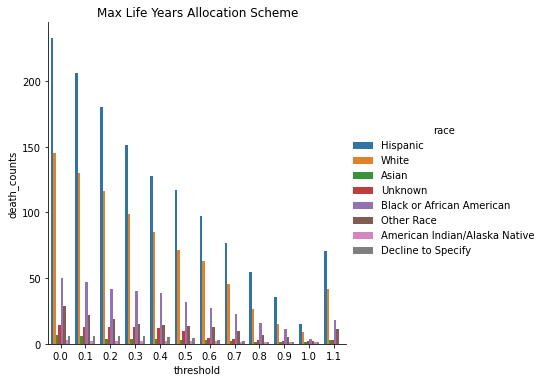

In [97]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', hue='race', data=try_df_max_life, kind='bar')
plt.title('Max Life Years Allocation Scheme')
sn_plot.savefig("max_life_plot_output.png")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 'Observed']


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


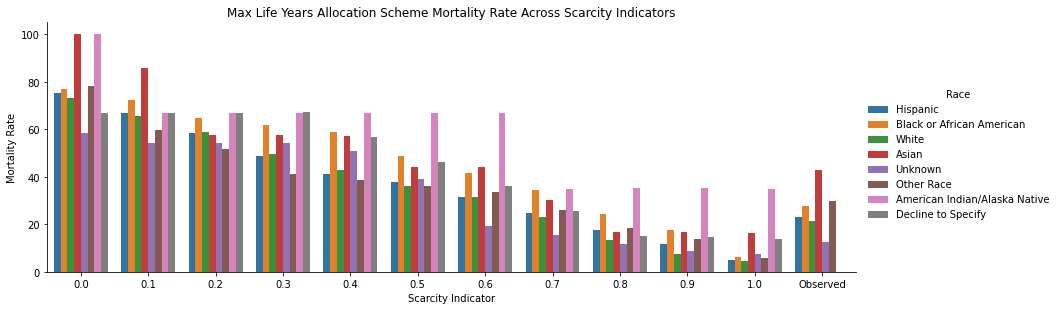

In [164]:
#%matplotlib qt
import matplotlib.pyplot as plt
'''
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df_max_life, kind='bar')
plt.title('Max Life Years Allocation Scheme')
sn_plot.savefig("max_life_plot_percent_output.png")
'''

temp_df = try_df_max_life.replace(to_replace=[1.1], value=['Observed'])
x_vals = list(temp_df['threshold'].unique())
x_vals.append(x_vals.pop(0))
print(x_vals)

sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=temp_df, kind='bar', order=x_vals, height=4, aspect=3)

plt.title('Max Life Years Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sn_plot._legend.set_title('Race')


sn_plot.savefig("final_figures/max_life_plot_percent_output.png")

### Youngest 

In [99]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

all_iters = []

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    
    iter_df_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.youngest()
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        
        count_dict = Counter(racial_deaths['race_display'])
        
        count_df = pd.DataFrame.from_dict(count_dict, orient='index').reset_index()
        count_df = count_df.rename(columns={'index': 'race', 0: 'death_counts'})
        
        dict_list.append(count_dict)
        iter_df_list.append(count_df)

    out_df = pd.concat(df_inner_list)
    out_df.to_csv('sim_results/youngest_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    #print(temp_new_df)
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    
    out_new_df = pd.concat(iter_df_list)
    
    out_new_df['threshold'] = threshold.round(3)
    #print(out_new_df)
    df_list_lot.append(temp_new_df)
    all_iters.append(out_new_df)

all_iters_df = pd.concat(all_iters)   
all_iters_df = all_iters_df.sort_values(by=['threshold', 'race'], inplace=False)
all_iters_df.to_csv('sim_results/all_youngest.csv'.format(threshold.round(3)))

In [100]:
try_df_youngest = pd.concat(df_list_lot)
try_df_youngest['death_percent'] = try_df_youngest.apply(lambda row: death_percent(row), axis=1)
try_df_youngest.to_csv('youngest_data_results.csv', index=False)
try_df_youngest

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,White,9.358,1.0,32.552000,4.726263,NaN
4,Black or African American,3.933,1.0,32.552000,6.050769,NaN
5,Decline to Specify,1.264,1.0,32.552000,14.044444,NaN
6,American Indian/Alaska Native,1.011,1.0,32.552000,33.700000,NaN


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


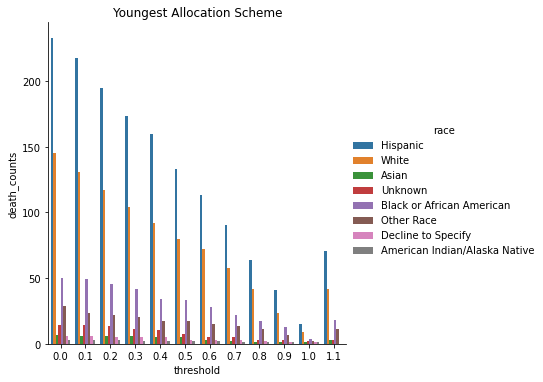

In [101]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', hue='race', data=try_df_youngest, kind='bar')
plt.title('Youngest Allocation Scheme')
sn_plot.savefig("youngest_plot_output.png")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 'Observed']


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


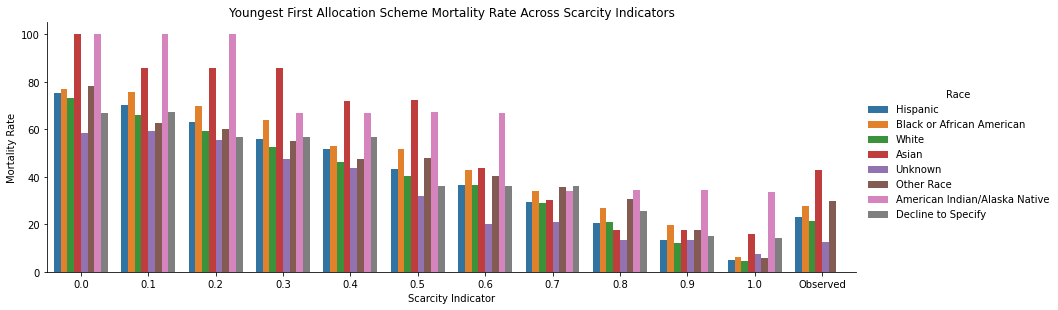

In [165]:
#%matplotlib qt
'''
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=try_df_youngest, kind='bar')
plt.title('Youngest Allocation Scheme')
sn_plot.savefig("youngest_plot_percent_output.png")
'''

temp_df = try_df_youngest.replace(to_replace=[1.1], value=['Observed'])
x_vals = list(temp_df['threshold'].unique())
x_vals.append(x_vals.pop(0))
print(x_vals)

sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=temp_df, kind='bar', order=x_vals, height=4, aspect=3)

plt.title('Youngest First Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sn_plot._legend.set_title('Race')


sn_plot.savefig("final_figures/youngest_plot_percent_output.png")

### Sickest First 

In [103]:
iters = ITER
df_list_lot = []
df_list_lot.append(baseline_deaths2)

all_iters = []

for threshold in thresholds:
    sums = 0
    dict_list = []
    df_inner_list = []
    
    iter_df_list = []
    for _ in range(iters):
        allocate = Allocation(working_df, threshold, qsofa_mortality_calibration)
        testing_df_lot = allocate.sickest_first()
        df_inner_list.append(testing_df_lot)
        sums += testing_df_lot['death'].sum()
        racial_deaths = testing_df_lot[testing_df_lot['death'] == 1]
        
        count_dict = Counter(racial_deaths['race_display'])
        
        count_df = pd.DataFrame.from_dict(count_dict, orient='index').reset_index()
        count_df = count_df.rename(columns={'index': 'race', 0: 'death_counts'})
        
        dict_list.append(count_dict)
        iter_df_list.append(count_df)

    out_df = pd.concat(df_inner_list)
    out_df.to_csv('sim_results/sickest_first_{}.csv'.format(threshold.round(3)))
    new_df = pd.DataFrame(dict_list)
    temp_new_df = new_df.mean().round(3).to_frame().reset_index()
    #print(temp_new_df)
    temp_new_df = temp_new_df.rename(columns={'index': 'race', 0: 'death_counts'})
    temp_new_df['threshold'] = threshold.round(3)
    temp_new_df['avg_deaths'] = sums/iters
    
    out_new_df = pd.concat(iter_df_list)
    
    out_new_df['threshold'] = threshold.round(3)
    #print(out_new_df)
    df_list_lot.append(temp_new_df)
    all_iters.append(out_new_df)

all_iters_df = pd.concat(all_iters)   
all_iters_df = all_iters_df.sort_values(by=['threshold', 'race'], inplace=False)
all_iters_df.to_csv('sim_results/all_sickest.csv'.format(threshold.round(3)))

In [104]:
testing_df_lot.head()

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,zip_binned_by_poverty,zip_binned_by_income,death,allocated_vent
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic,White Hispanic,...,78130,1.5,10,65627.0,84515,9.5,2,3,0,yes
645,2020-11-12 13:00:00,2020-11-15 14:56:00,Williamson,IP ICU,85,Female,78681,Unknown,Black or African American,White Unknown Ethnicity,...,78681,0.8,4.7,107912.0,127129,3.5,1,5,0,yes
407,2020-06-29 07:53:00,2020-06-30 22:30:00,Medical Center,IP ICU,72,Male,78703,Not Hispanic or Latino,White,White Non Hispanic,...,78703,1.6,4.5,108548.0,184824,4.8,1,5,0,yes
408,2020-07-11 21:33:00,2020-07-24 17:00:00,Medical Center,IP Private/Semi Private room,45,Male,78703,Not Hispanic or Latino,Hispanic,White Non Hispanic,...,78703,1.6,4.5,108548.0,184824,4.8,1,5,0,yes
108,2020-08-29 02:01:00,2020-10-01 12:59:00,Dell Seton Med Cntr UT,IP Private Room,66,Female,78741,Hispanic or Latino,Hispanic,White Hispanic,...,78741,2.8,26.7,45835.0,62128,23.4,4,2,0,yes


In [105]:
try_df_sickest = pd.concat(df_list_lot)
try_df_sickest['death_percent'] = try_df_sickest.apply(lambda row: death_percent(row), axis=1)
try_df_sickest.to_csv('sickest_data_results.csv', index=False)
try_df_sickest

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type
0,Hispanic,71.000,1.1,24.666667,22.977346,Baseline
1,White,42.000,1.1,24.666667,21.212121,Baseline
2,Asian,3.000,1.1,24.666667,42.857143,Baseline
3,Unknown,3.000,1.1,24.666667,12.500000,Baseline
4,Black or African American,18.000,1.1,24.666667,27.692308,Baseline
...,...,...,...,...,...,...
3,Other Race,2.221,1.0,32.614000,6.002703,NaN
4,Unknown,1.845,1.0,32.614000,7.687500,NaN
5,White,9.214,1.0,32.614000,4.653535,NaN
6,Asian,1.091,1.0,32.614000,15.585714,NaN


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


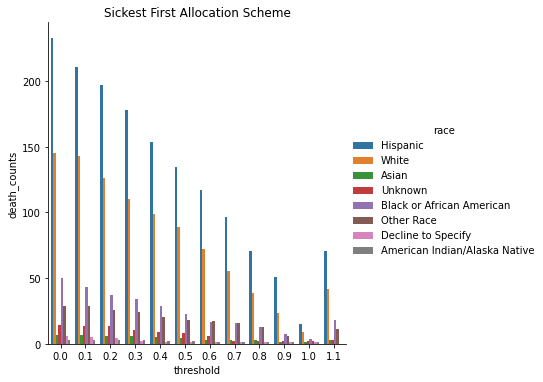

In [106]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='death_counts', hue='race', data=try_df_sickest, kind='bar')
plt.title('Sickest First Allocation Scheme')
sn_plot.savefig("sickest_plot_output.png")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 'Observed']


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


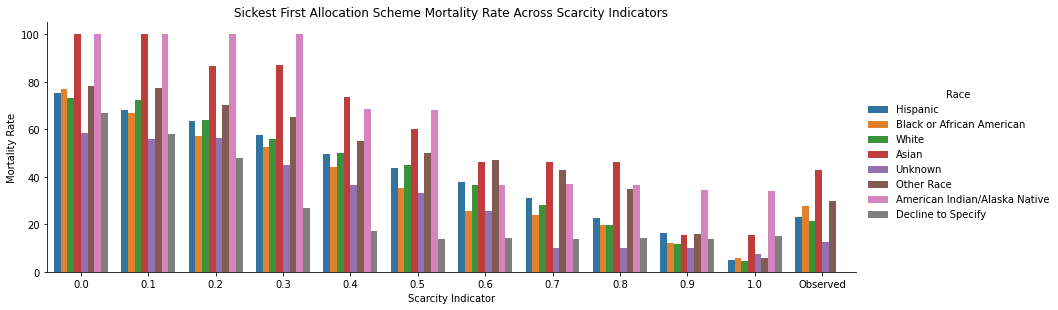

In [166]:
#%matplotlib qt
import matplotlib.pyplot as plt

temp_df = try_df_sickest.replace(to_replace=[1.1], value=['Observed'])
x_vals = list(temp_df['threshold'].unique())
x_vals.append(x_vals.pop(0))
print(x_vals)

sn_plot = sn.factorplot(x='threshold', y='death_percent', 
                        hue='race', hue_order = race_hue_labels, data=temp_df, kind='bar', order=x_vals, height=4, aspect=3)

plt.title('Sickest First Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sn_plot._legend.set_title('Race')


sn_plot.savefig("final_figures/sickest_plot_percent_output.png")

### Total 

In [108]:
try_df['allocation_type'] = 'Lottery'
try_df_ny['allocation_type'] = 'New York'
try_df_mar['allocation_type'] = 'Maryland'
try_df_youngest['allocation_type'] = 'Youngest First'
try_df_max_life['allocation_type'] = 'Max Life Years'
try_df_sickest['allocation_type'] = 'Sickest First'

In [109]:
total_df = pd.concat([
    try_df[['allocation_type', 'threshold', 'avg_deaths']], 
    try_df_ny[['allocation_type', 'threshold', 'avg_deaths']], 
    try_df_mar[['allocation_type', 'threshold', 'avg_deaths']], 
    try_df_youngest[['allocation_type', 'threshold', 'avg_deaths']], 
    try_df_max_life[['allocation_type', 'threshold', 'avg_deaths']], 
    try_df_sickest[['allocation_type', 'threshold', 'avg_deaths']], 
])

In [110]:
total_df.to_csv('total_avg_deaths_data_results.csv', index=False)

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


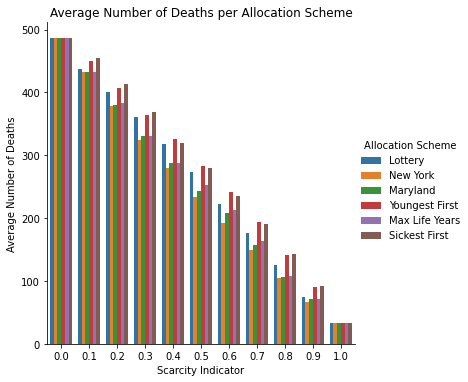

In [177]:
#%matplotlib qt
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='avg_deaths', hue='allocation_type', data=total_df[total_df['threshold'] != 1.1]
                        , kind='bar', legend_out=True)
plt.title('Average Number of Deaths per Allocation Scheme')
sn_plot._legend.set_title('Allocation Scheme')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Average Number of Deaths')
sn_plot.savefig("final_figures/total_avg_deaths_plot_output.png")

### Break

In [112]:
all_iters_df =  pd.read_csv('sim_results/all_sickest.csv')
all_iters_df['death_percent'] = all_iters_df.apply(lambda row: death_percent(row), axis=1)
all_iters_df.to_csv('sim_results/all_sickest.csv')

In [113]:
all_iters_df =  pd.read_csv('sim_results/all_lottery.csv')
all_iters_df['death_percent'] = all_iters_df.apply(lambda row: death_percent(row), axis=1)
all_iters_df.to_csv('sim_results/all_lottery.csv')

In [114]:
all_iters_df =  pd.read_csv('sim_results/all_ny.csv')
all_iters_df['death_percent'] = all_iters_df.apply(lambda row: death_percent(row), axis=1)
all_iters_df.to_csv('sim_results/all_ny.csv')

In [115]:
all_iters_df =  pd.read_csv('sim_results/all_mar.csv')
all_iters_df['death_percent'] = all_iters_df.apply(lambda row: death_percent(row), axis=1)
all_iters_df.to_csv('sim_results/all_mar.csv')

In [116]:
all_iters_df =  pd.read_csv('sim_results/all_youngest.csv')
all_iters_df['death_percent'] = all_iters_df.apply(lambda row: death_percent(row), axis=1)
all_iters_df.to_csv('sim_results/all_youngest.csv')

In [117]:
all_iters_df =  pd.read_csv('sim_results/all_max_life_years.csv')
all_iters_df['death_percent'] = all_iters_df.apply(lambda row: death_percent(row), axis=1)
all_iters_df.to_csv('sim_results/all_max_life_years.csv')